In [63]:
import asyncio
import websockets
import json
import pandas as pd
import datetime as dt
import nest_asyncio
from concurrent.futures import ThreadPoolExecutor
nest_asyncio.apply()

import datetime
from pandas.io.json import json_normalize
import numpy as np
from scipy import interpolate
import statsmodels.api as sm

from market_data import HistData
from market_data import Options

import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
hdata = HistData('ETH')

### Get Current Trading Price

In [65]:
hdata.get_idx_price()

2305.8

### Get Available Timeframes

In [66]:
hdata.get_timeframes()

{'1min': 1,
 '3min': 3,
 '5min': 5,
 '10min': 10,
 '15min': 15,
 '30min': 30,
 '1hr': 60,
 '2hr': '120',
 '3hr': 180,
 '6hr': 360,
 '12hr': 720,
 '1d': '1D'}

### Get Historical Data

In [67]:
start = int(pd.to_datetime('20230101').timestamp()*1000)
end = int(pd.datetime.today().timestamp()*1000)
timeframe = 60
df = hdata.retrieve_hist_data(start,end,'ETH-PERPETUAL',timeframe)
df

,ticks,volume,cost,status,open,low,high,close
timestamp,,,,,,,,
2023-07-11 12:00:00,1.689048e+09,116.799906,219760.0,ok,1880.85,1879.80,1881.70,1879.80
2023-07-11 13:00:00,1.689052e+09,35.184519,66125.0,ok,1879.15,1879.00,1879.85,1879.00
2023-07-11 14:00:00,1.689055e+09,2879.603458,5430140.0,ok,1879.10,1879.10,1890.95,1886.90
2023-07-11 15:00:00,1.689059e+09,193.377215,364365.0,ok,1884.95,1883.05,1885.90,1883.35
2023-07-11 16:00:00,1.689062e+09,956.914383,1802147.0,ok,1883.45,1879.45,1884.60,1879.45
...,...,...,...,...,...,...,...,...
2024-02-04 16:00:00,1.707034e+09,286.731968,656622.0,ok,2290.75,2289.20,2291.70,2289.35
2024-02-04 17:00:00,1.707037e+09,1336.641257,3067573.0,ok,2289.55,2286.05,2304.05,2301.25
2024-02-04 18:00:00,1.707041e+09,462.521787,1063719.0,ok,2302.35,2297.15,2303.10,2298.30


## Options

In [68]:
opt = Options('ETH')

## Get all active Eth options

In [69]:
eth_active_options = opt.get_all_active_options()
eth_active_options

648 active options.


,tick_size_steps,quote_currency,min_trade_amount,expiration_timestamp,counter_currency,settlement_period,settlement_currency,block_trade_tick_size,block_trade_min_trade_amount,block_trade_commission,...,instrument_type,taker_commission,maker_commission,strike,is_active,kind,rfq,price_index,creation_date,expiration_date
instrument_name,,,,,,,,,,,,,,,,,,,,,
ETH-5FEB24-1950-C,"[{'above_price': 0.005, 'tick_size': 0.0005}]",ETH,1,1707120000000,USD,day,ETH,0.0001,250,0.0003,...,reversed,0.0003,0.0003,1950.0,True,option,False,eth_usd,2024-02-02 08:13:00,2024-02-05 08:00:00
ETH-5FEB24-1950-P,"[{'above_price': 0.005, 'tick_size': 0.0005}]",ETH,1,1707120000000,USD,day,ETH,0.0001,250,0.0003,...,reversed,0.0003,0.0003,1950.0,True,option,False,eth_usd,2024-02-02 08:13:00,2024-02-05 08:00:00
ETH-5FEB24-2000-C,"[{'above_price': 0.005, 'tick_size': 0.0005}]",ETH,1,1707120000000,USD,day,ETH,0.0001,250,0.0003,...,reversed,0.0003,0.0003,2000.0,True,option,False,eth_usd,2024-02-02 08:01:00,2024-02-05 08:00:00
ETH-5FEB24-2000-P,"[{'above_price': 0.005, 'tick_size': 0.0005}]",ETH,1,1707120000000,USD,day,ETH,0.0001,250,0.0003,...,reversed,0.0003,0.0003,2000.0,True,option,False,eth_usd,2024-02-02 08:01:00,2024-02-05 08:00:00
ETH-5FEB24-2050-C,"[{'above_price': 0.005, 'tick_size': 0.0005}]",ETH,1,1707120000000,USD,day,ETH,0.0001,250,0.0003,...,reversed,0.0003,0.0003,2050.0,True,option,False,eth_usd,2024-02-02 08:01:00,2024-02-05 08:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ETH-27DEC24-8500-P,"[{'above_price': 0.005, 'tick_size': 0.0005}]",ETH,1,1735286400000,USD,month,ETH,0.0001,250,0.0003,...,reversed,0.0003,0.0003,8500.0,True,option,False,eth_usd,2023-12-28 08:01:00,2024-12-27 08:00:00
ETH-27DEC24-9000-C,"[{'above_price': 0.005, 'tick_size': 0.0005}]",ETH,1,1735286400000,USD,month,ETH,0.0001,250,0.0003,...,reversed,0.0003,0.0003,9000.0,True,option,False,eth_usd,2024-01-10 21:14:00,2024-12-27 08:00:00
ETH-27DEC24-9000-P,"[{'above_price': 0.005, 'tick_size': 0.0005}]",ETH,1,1735286400000,USD,month,ETH,0.0001,250,0.0003,...,reversed,0.0003,0.0003,9000.0,True,option,False,eth_usd,2024-01-10 21:14:00,2024-12-27 08:00:00


### Get actively traded option chains

In [70]:
option_chain_mar = opt.get_option_chain('20240301',option_type='call')
option_chain_dec = opt.get_option_chain('20241201',option_type='call')

648 active options.
1710979200000
Expiration Date:  2024-03-29 16:00:00
648 active options.
1734739200000
Expiration Date:  2024-12-27 16:00:00


In [71]:
option_chain_mar

,estimated_delivery_price,best_bid_amount,best_ask_amount,bid_iv,ask_iv,underlying_index,underlying_price,mark_iv,best_bid_price,best_ask_price,...,greeks.vega,greeks.gamma,greeks.delta,stats.volume_usd,stats.volume,stats.price_change,stats.low,stats.high,strike,expiration_date
0,2305.59,345.0,345.0,0.00,325.57,ETH-29MAR24,2326.90,160.21,0.9100,0.9170,...,0.00035,0.00000,0.99999,0.00,0.0,NaN,NaN,NaN,200,2024-03-29 16:00:00
0,2305.59,345.0,345.0,0.00,222.91,ETH-29MAR24,2326.90,158.54,0.8235,0.8305,...,0.02154,0.00000,0.99930,0.00,0.0,NaN,NaN,NaN,400,2024-03-29 16:00:00
0,2305.59,345.0,345.0,0.00,215.12,ETH-29MAR24,2326.87,133.66,0.7820,0.7895,...,0.01799,0.00000,0.99943,0.00,0.0,NaN,NaN,NaN,500,2024-03-29 16:00:00
0,2305.59,345.0,345.0,0.00,190.09,ETH-29MAR24,2326.90,123.88,0.7390,0.7465,...,0.03040,0.00000,0.99899,0.00,0.0,NaN,NaN,NaN,600,2024-03-29 16:00:00
0,2305.59,345.0,345.0,0.00,148.20,ETH-29MAR24,2326.90,102.70,0.6525,0.6600,...,0.05254,0.00001,0.99816,0.00,0.0,NaN,NaN,NaN,800,2024-03-29 16:00:00
0,2305.59,345.0,345.0,0.00,121.95,ETH-29MAR24,2326.90,86.34,0.5670,0.5745,...,0.08990,0.00001,0.99667,0.00,0.0,NaN,NaN,NaN,1000,2024-03-29 16:00:00
0,2305.59,345.0,345.0,0.00,100.12,ETH-29MAR24,2326.87,74.17,0.4810,0.4890,...,0.16983,0.00003,0.99320,0.00,0.0,NaN,NaN,NaN,1200,2024-03-29 16:00:00
0,2305.59,345.0,429.0,0.00,82.67,ETH-29MAR24,2326.87,65.31,0.3955,0.4040,...,0.35265,0.00007,0.98426,0.00,0.0,NaN,NaN,NaN,1400,2024-03-29 16:00:00
0,2305.59,345.0,424.0,0.00,74.40,ETH-29MAR24,2326.90,61.03,0.3530,0.3615,...,0.49169,0.00010,0.97673,0.00,0.0,NaN,NaN,NaN,1500,2024-03-29 16:00:00
0,2305.59,345.0,345.0,0.00,67.54,ETH-29MAR24,2326.90,57.10,0.3105,0.3195,...,0.68334,0.00015,0.96544,0.00,0.0,NaN,NaN,NaN,1600,2024-03-29 16:00:00


### Option IV profile

<Axes: title={'center': 'Mar24 ETH Call Option IV Profile'}, xlabel='strike'>

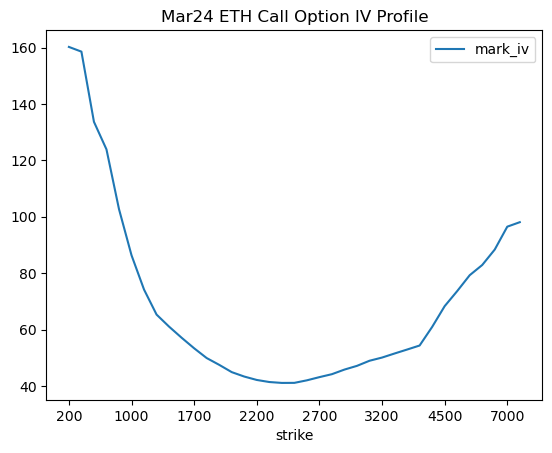

In [72]:
option_chain_mar[['strike','mark_iv']].set_index('strike').plot(title = 'Mar24 ETH Call Option IV Profile')
#option_chain_dec[['strike','mark_iv']].set_index('strike').plot()

### Option Implied Volatility Surface

In [73]:
mths = np.arange(0,10,1)
first_date = pd.to_datetime('20240101')
target_dates = [first_date +datetime.timedelta(days = 30*int(mth)) for mth in mths]
full_opt_chain = pd.DataFrame()
for target_date in target_dates:
    full_opt_chain = pd.concat([full_opt_chain,opt.get_option_chain(target_expiry=target_date,option_type='call')])


iv_surface = full_opt_chain[['expiration_date','strike','mark_iv']]
iv_surface['days_to_expiry'] = [(dt - pd.datetime.today()).days for dt in iv_surface['expiration_date']]
iv_surface['expiration_date'] = [dt.strftime('%Y%m%d') for dt in iv_surface['expiration_date']]

iv_surface = iv_surface.fillna(method = 'ffill').fillna(method = 'bfill')
#iv_surface['expiration_date']=iv_surface['expiration_date'].astype(int)
#iv_surface = pd.pivot_table(iv_surface,index = 'strike',columns ='strike' ,aggfunc='mean').fillna(method ='bfill').fillna(method ='ffill')



648 active options.
1705795200000
Expiration Date:  2024-02-05 16:00:00
648 active options.
1708387200000
Expiration Date:  2024-02-23 16:00:00
648 active options.
1710979200000
Expiration Date:  2024-03-29 16:00:00
648 active options.
1713571200000
Expiration Date:  2024-04-26 16:00:00
648 active options.
1716163200000
Expiration Date:  2024-06-28 16:00:00
648 active options.
1718755200000
Expiration Date:  2024-06-28 16:00:00
648 active options.
1721347200000
Expiration Date:  2024-09-27 16:00:00
648 active options.
1723939200000
Expiration Date:  2024-09-27 16:00:00
648 active options.
1726531200000
Expiration Date:  2024-09-27 16:00:00
648 active options.
1729123200000
Expiration Date:  2024-12-27 16:00:00


import plotly.express as px

iv_surface = iv_surface.apply(pd.to_numeric,axis=1)

fig = px.scatter_3d(iv_surface, x='expiration_date', y='strike', z='mark_iv',color = 'mark_iv',
                    size_max = 2)
fig.show()

Text(0.5, 0.92, 'ETH Call Option Implied Volatility Surface')

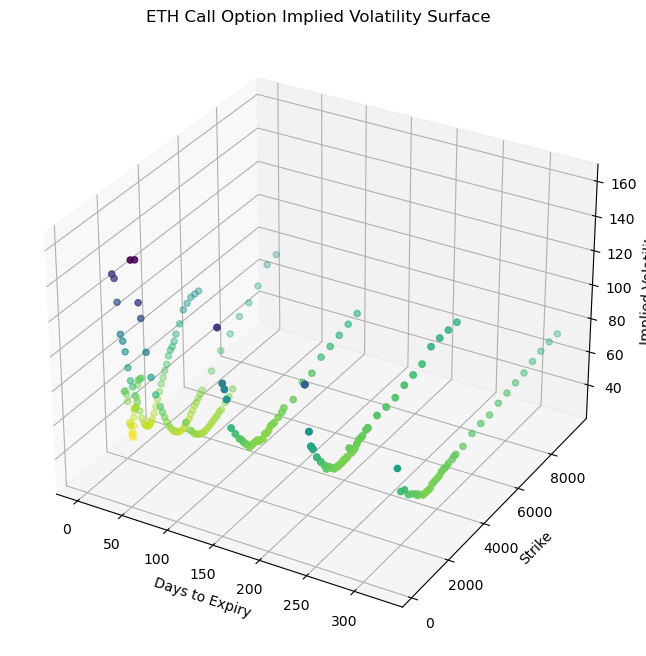

In [74]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
iv_surface = iv_surface.apply(pd.to_numeric,axis=1)
cmhot = plt.get_cmap("viridis_r")
c = iv_surface['mark_iv']
ax.scatter(iv_surface[['days_to_expiry']],iv_surface[['strike']],iv_surface[['mark_iv']],cmap = cmhot,c=c)
ax.set_xlabel('Days to Expiry')
ax.set_ylabel('Strike')
ax.set_zlabel('Implied Volatility')
ax.set_title('ETH Call Option Implied Volatility Surface')


### Option Delta Profile

<Axes: title={'center': 'Mar24 ETH Call Option Delta'}, xlabel='strike'>

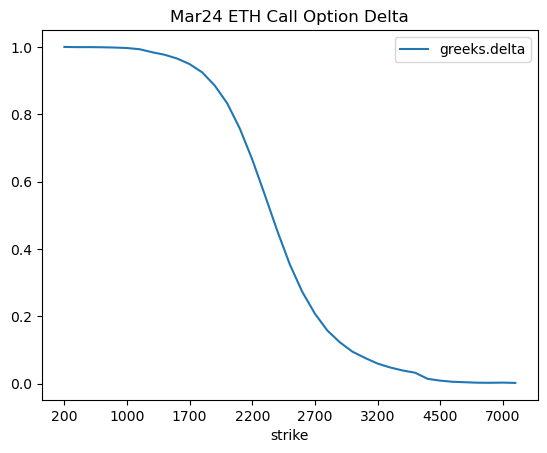

In [75]:
option_chain_mar[['strike','greeks.delta']].set_index('strike').plot(title = 'Mar24 ETH Call Option Delta')

### Option Vega Profile

<Axes: title={'center': 'Mar24 ETH Call Option Vega'}, xlabel='strike'>

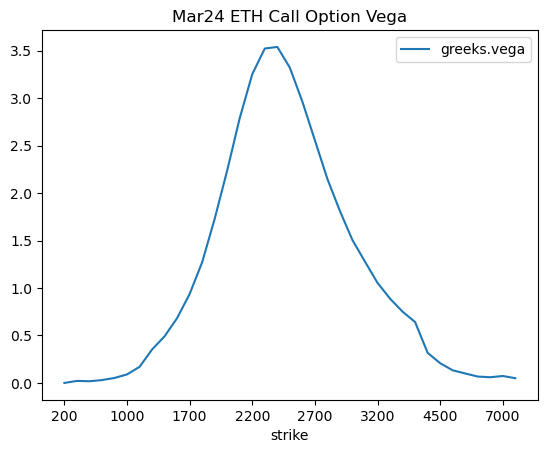

In [76]:
option_chain_mar[['strike','greeks.vega']].set_index('strike').plot(title = 'Mar24 ETH Call Option Vega')

### Option Gamma Profle

<Axes: title={'center': 'Mar24 ETH Call Option Gamma'}, xlabel='strike'>

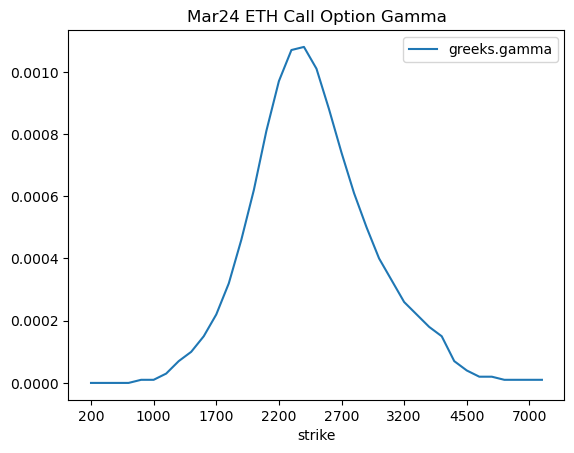

In [77]:
option_chain_mar[['strike','greeks.gamma']].set_index('strike').plot(title = 'Mar24 ETH Call Option Gamma')